In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [2]:
# Define the ticker symbol
ticker_symbol = "GOOGL"

# Download historical data from yfinance
Google = yf.download(ticker_symbol, start='2004-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
# Rename columns to match the desired format
Google.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [4]:
# Reset the index to include the Date column explicitly
Google.reset_index(inplace=True)

In [5]:
  # Format the Date column to remove the time portion
  Google['Date'] = Google['Date'].dt.date

In [6]:
Google

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.504808,2.511011,2.604104,2.401401,2.502503,893181924
1,2004-08-20,2.703765,2.710460,2.729730,2.515015,2.527778,456686856
2,2004-08-23,2.730975,2.737738,2.839840,2.728979,2.771522,365122512
3,2004-08-24,2.617892,2.624374,2.792793,2.591842,2.783784,304946748
4,2004-08-25,2.646101,2.652653,2.702703,2.599600,2.626627,183772044
...,...,...,...,...,...,...,...
4870,2023-12-22,141.140518,141.490005,141.990005,140.710007,140.770004,26514600
4871,2023-12-26,141.170441,141.520004,142.679993,141.190002,141.589996,16780300
4872,2023-12-27,140.023270,140.369995,142.080002,139.889999,141.589996,19628600
4873,2023-12-28,139.883621,140.229996,141.139999,139.750000,140.779999,16045700


In [7]:
Google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.504808,2.511011,2.604104,2.401401,2.502503,893181924
1,2004-08-20,2.703765,2.710460,2.729730,2.515015,2.527778,456686856
2,2004-08-23,2.730975,2.737738,2.839840,2.728979,2.771522,365122512
3,2004-08-24,2.617892,2.624374,2.792793,2.591842,2.783784,304946748
4,2004-08-25,2.646101,2.652653,2.702703,2.599600,2.626627,183772044


In [8]:
Google.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4870,2023-12-22,141.140518,141.490005,141.990005,140.710007,140.770004,26514600
4871,2023-12-26,141.170441,141.520004,142.679993,141.190002,141.589996,16780300
4872,2023-12-27,140.023270,140.369995,142.080002,139.889999,141.589996,19628600
4873,2023-12-28,139.883621,140.229996,141.139999,139.750000,140.779999,16045700
4874,2023-12-29,139.344955,139.690002,140.360001,138.779999,139.630005,18727200


In [9]:
Google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4875 entries, 0 to 4874
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4875 non-null   object 
 1   Open       4875 non-null   float64
 2   High       4875 non-null   float64
 3   Low        4875 non-null   float64
 4   Close      4875 non-null   float64
 5   Adj Close  4875 non-null   float64
 6   Volume     4875 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 266.7+ KB


In [10]:
Google.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4875.000000,4875.000000,4875.000000,4875.000000,4875.000000,4.875000e+03
mean,41.813308,41.916845,42.346107,41.468347,41.906119,1.201621e+08
std,38.563467,38.658957,39.074717,38.225827,38.638828,1.492601e+08
min,2.496571,2.502753,2.546046,2.401401,2.482232,9.312000e+06
25%,12.879769,12.911662,13.043293,12.781281,12.924424,3.176400e+07
50%,27.023087,27.090000,27.290501,26.858000,27.104000,6.412781e+07
75%,58.212107,58.356249,58.834251,57.576750,58.012501,1.458980e+08
max,149.468399,149.838501,151.546494,148.899002,151.250000,1.643023e+09


In [11]:
Google.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
Google['Date'] = pd.to_datetime(Google['Date'])
# Verify the conversion
print(Google.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


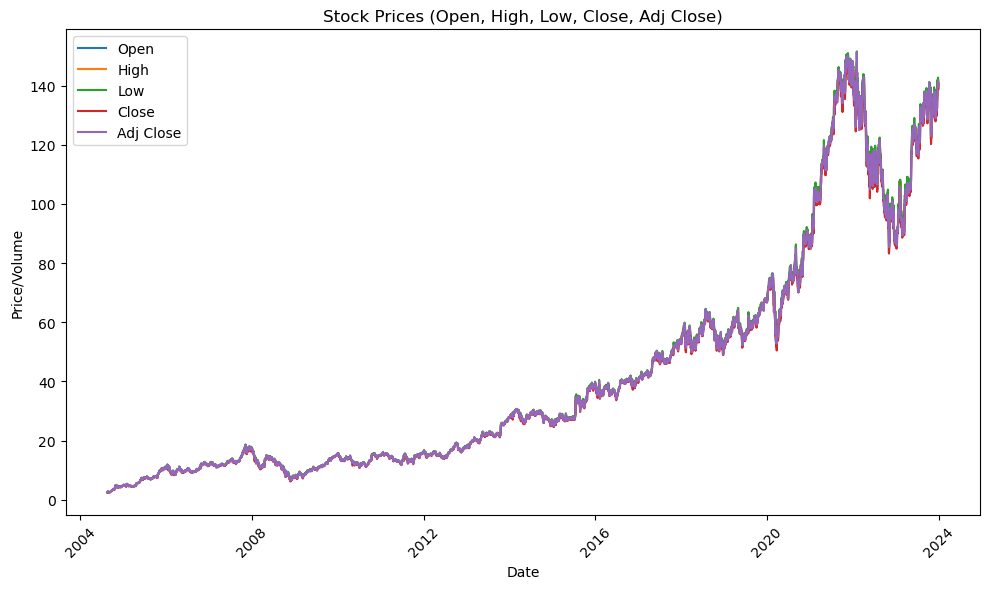

In [13]:
plt.figure(figsize=(10, 6))

sns.lineplot(x='Date', y='Open', data=Google, label='Open')
sns.lineplot(x='Date', y='High', data=Google, label='High')
sns.lineplot(x='Date', y='Low', data=Google, label='Low')
sns.lineplot(x='Date', y='Close', data=Google, label='Close')
sns.lineplot(x='Date', y='Adj Close', data=Google, label='Adj Close')

plt.xlabel('Date')
plt.ylabel('Price/Volume')
plt.title('Stock Prices (Open, High, Low, Close, Adj Close)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [14]:
# Step 2: Extract useful features from the 'Date' column
Google['Year'] = Google['Date'].dt.year
Google['Month'] = Google['Date'].dt.month
Google['Day'] = Google['Date'].dt.day
Google['DayOfWeek'] = Google['Date'].dt.dayofweek  # Monday=0, Sunday=6
Google['IsMonthStart'] = Google['Date'].dt.is_month_start.astype(int)
Google['IsMonthEnd'] = Google['Date'].dt.is_month_end.astype(int)

In [15]:
# View the updated data
print(Google[['Date', 'Year', 'Month', 'Day', 'DayOfWeek', 'IsMonthStart', 'IsMonthEnd']].head())

        Date  Year  Month  Day  DayOfWeek  IsMonthStart  IsMonthEnd
0 2004-08-19  2004      8   19          3             0           0
1 2004-08-20  2004      8   20          4             0           0
2 2004-08-23  2004      8   23          0             0           0
3 2004-08-24  2004      8   24          1             0           0
4 2004-08-25  2004      8   25          2             0           0


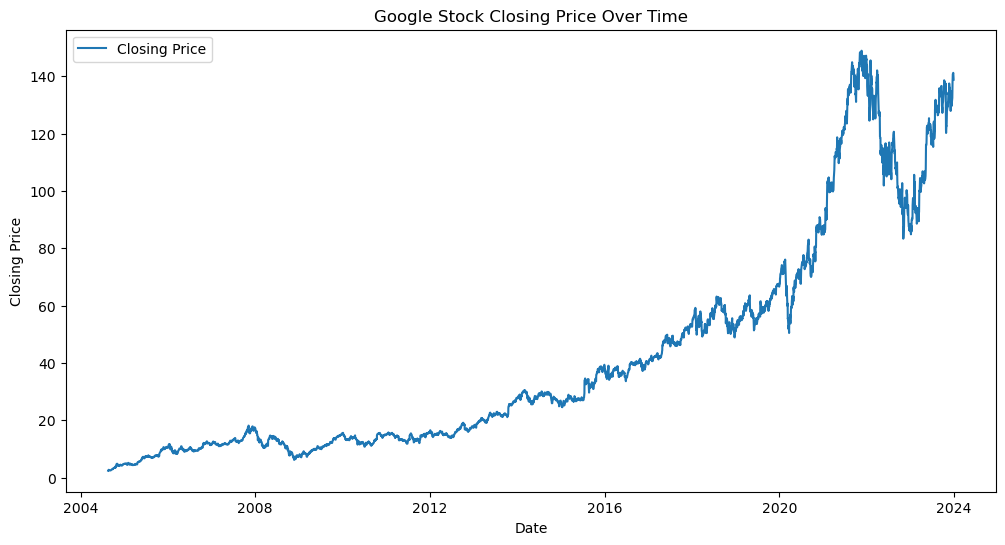

In [16]:
# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(Google['Date'], Google['Close'], label='Closing Price')
plt.title('Google Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

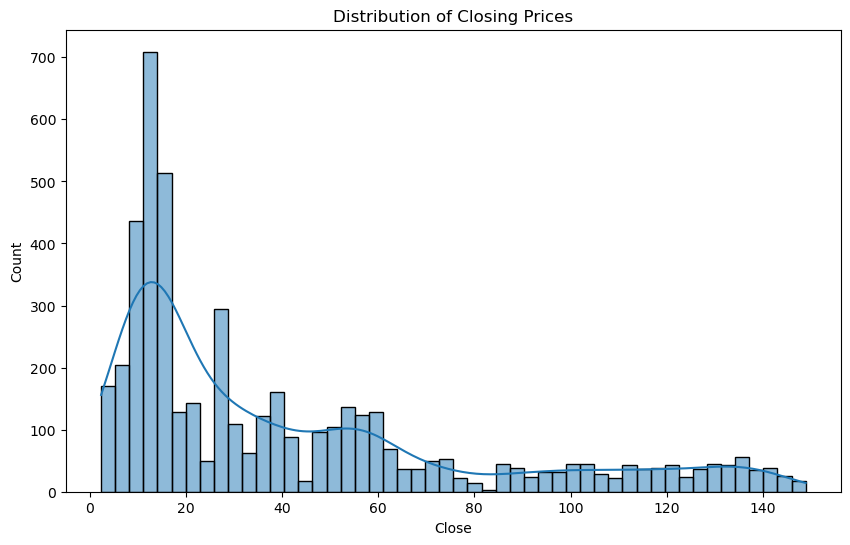

In [17]:
# Step 4: Distribution of stock prices
plt.figure(figsize=(10, 6))
sns.histplot(Google['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()

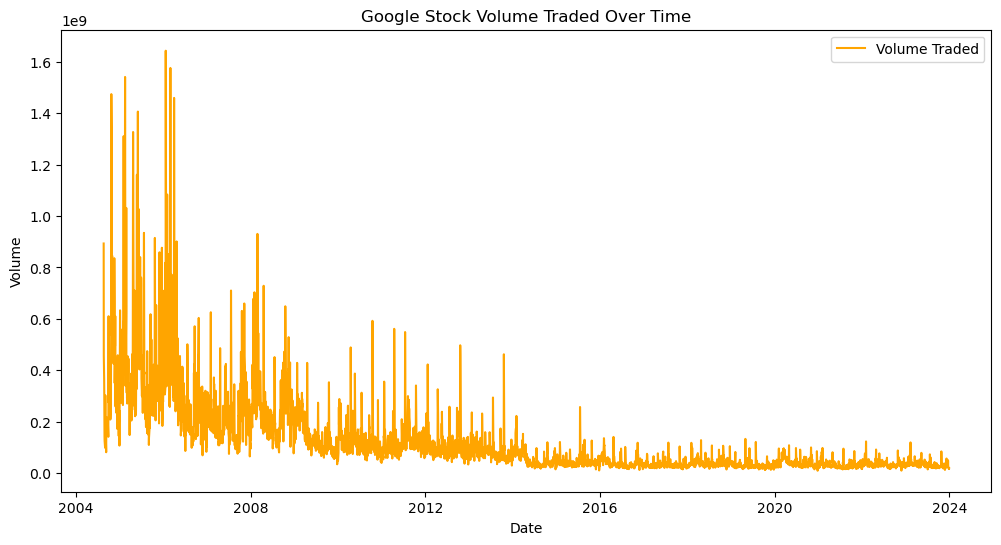

In [18]:
#  Volume traded over time
plt.figure(figsize=(12, 6))
plt.plot(Google['Date'], Google['Volume'], label='Volume Traded', color='orange')
plt.title('Google Stock Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [19]:
# Calculate moving averages
Google['MA50'] = Google['Close'].rolling(window=50).mean()
Google['MA200'] = Google['Close'].rolling(window=200).mean()

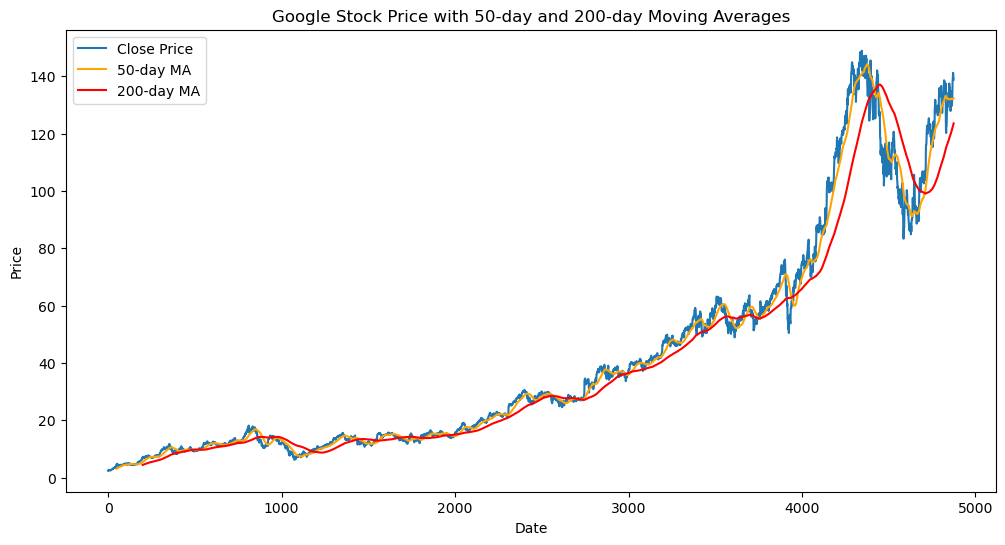

In [20]:
# Plot Close price along with moving averages
plt.figure(figsize=(12, 6))
plt.plot(Google['Close'], label='Close Price')
plt.plot(Google['MA50'], label='50-day MA', color='orange')
plt.plot(Google['MA200'], label='200-day MA', color='red')
plt.title('Google Stock Price with 50-day and 200-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Seasonal Decomposition**


Additive Seasonality Check

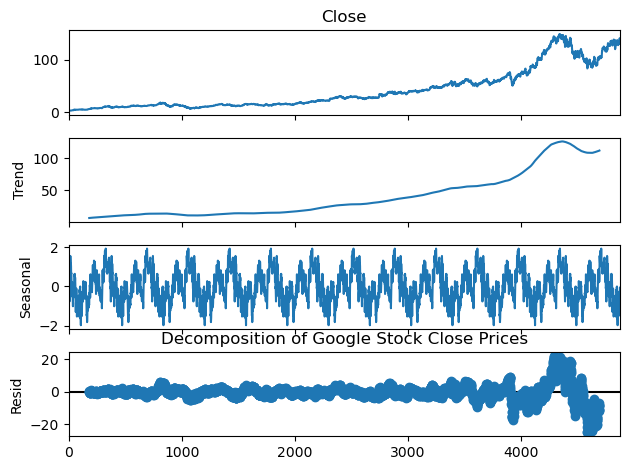

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(Google['Close'], model='additive', period=365)
decomposition.plot()

plt.title('Decomposition of Google Stock Close Prices')
plt.show()

Multiplicative Seasonality Check

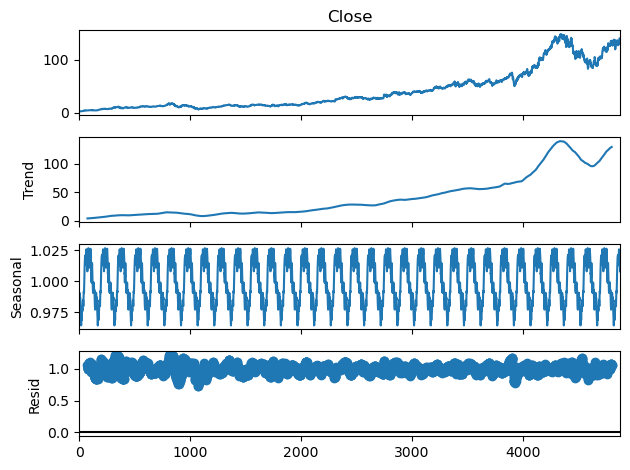

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
figsize=(15, 20)
result = seasonal_decompose(Google['Close'], model='multiplicative', period=150)
result.plot()
plt.tight_layout()
plt.show()

**Model Building**

**LSTM**

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Load and Preprocess the Data

In [30]:
# Use only 'Date' and 'Close' columns
Google['Date'] = pd.to_datetime(Google['Date'])
Google = Google[['Date', 'Close']].set_index('Date')

Scale the Data

In [33]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Google[['Close']])

Create Traing and Testing Data

In [36]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

Create Sequences

In [39]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

seq_length = 60
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

  Build and Train  LSTM model

*Define the LSTM Model*

In [43]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

*Compile the Model*

In [46]:
model.compile(optimizer='adam', loss='mean_squared_error')

Train the model

In [49]:
model.fit(x_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0040
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 6.0015e-05
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 4.5930e-05
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4.4922e-05
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4.9599e-05
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4.3840e-05
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 4.6713e-05
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 4.5742e-05
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.7172e-05
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.2204e-05
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4.0859e-05
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.7934e-05
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.0495e-05
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 4.8269e-05
Epoch 15/50
60/60 ━

Evaluation of Model

*Make Predictions*

In [52]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


*Calculate Mean Squared Error and Mean Absolute Percentage Error*

In [54]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error: 6.399219796665225
Mean Absolute Percentage Error (MAPE): 1.7729262128302639


*Plot the Results*

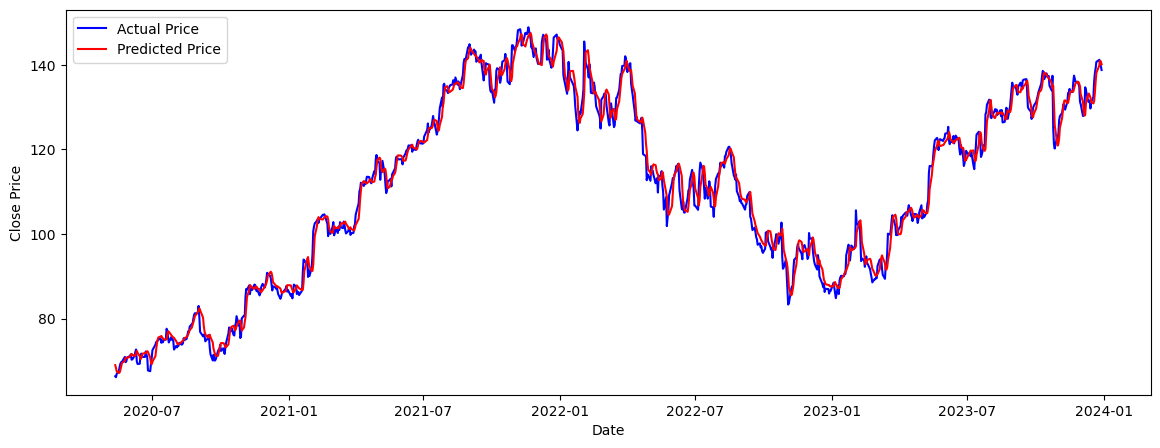

Model Accuracy: 98.22707378716973 %


In [62]:
plt.figure(figsize=(14, 5))
plt.plot(Google.index[-len(y_test):], y_test, color='blue', label='Actual Price')
plt.plot(Google.index[-len(y_test):], predictions, color='red', label='Predicted Price')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

accuracy = 100 - mape
print("Model Accuracy:", accuracy, "%")

**Forecast the Next 30 Days**

*Prepare the Last Known Data for Prediction*

In [54]:
last_known_data = test_data[-seq_length:]  # Get the last known sequence of data
current_input = last_known_data.reshape(1, seq_length, 1)  # Reshape for LSTM input

Generate for next 30 days

In [56]:
n_future_days = 30  # Number of days to predict
future_predictions_scaled = []

for _ in range(n_future_days):
    # Predict the next day
    next_prediction_scaled = model.predict(current_input)

    # Collect the prediction
    future_predictions_scaled.append(next_prediction_scaled[0, 0])

    # Prepare the input for the next prediction
    next_input = np.append(current_input[:, 1:, :], next_prediction_scaled.reshape(1, 1, 1), axis=1)
    current_input = next_input


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

*Inverse Transform the Predictions*

In [58]:
future_predictions_scaled = np.array(future_predictions_scaled).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions_scaled)

*Visualize the Future Predictions*

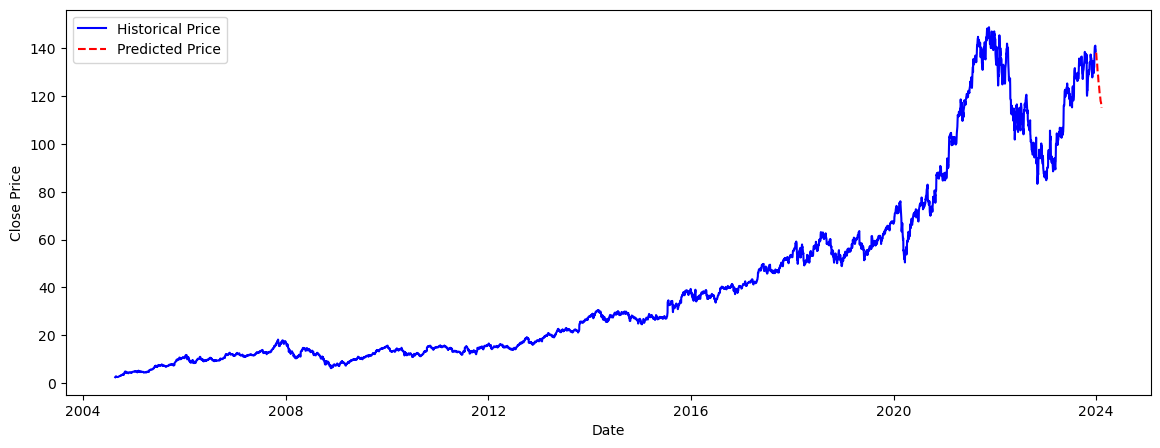

In [60]:
last_date = Google.index[-1]
future_dates = pd.date_range(start=last_date, periods=n_future_days + 1, freq='B')[1:]  # Skip the last date to start from the next day
future_predictions_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted Close'])

plt.figure(figsize=(14, 5))
plt.plot(Google.index, Google['Close'], color='blue', label='Historical Price')
plt.plot(future_predictions_df.index, future_predictions_df['Predicted Close'], color='red', linestyle='dashed', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

**Creating a Function to Predict Closing Price for a Specific Future Date**


In [62]:
# Function to predict future closing price for a given date
def predict_future_price(target_date):
    # Step 1: Calculate the number of days to predict
    last_date = Google.index[-1]  # Get the last date in the dataset
    target_date = pd.to_datetime(target_date)  # Convert the target date string to datetime
    n_future_days = (target_date - last_date).days  # Calculate the difference in days

    # Step 2: Check if the target date is in the future
    if n_future_days <= 0:
        raise ValueError("Target date must be in the future")

    # Step 3: Prepare the last known data
    last_known_data = test_data[-seq_length:]  # Get the last `seq_length` data points
    current_input = last_known_data.reshape(1, seq_length, 1)  # Reshape for LSTM input

    # Step 4: Generate future predictions
    future_predictions_scaled = []
    for _ in range(n_future_days):
        next_prediction_scaled = model.predict(current_input)  # Predict the next closing price
        future_predictions_scaled.append(next_prediction_scaled[0, 0])  # Store the prediction

        # Update input for the next prediction
        next_input = np.append(current_input[:, 1:, :], next_prediction_scaled.reshape(1, 1, 1), axis=1)
        current_input = next_input  # Prepare for the next iteration

    # Step 5: Inverse transform the predictions
    future_predictions_scaled = np.array(future_predictions_scaled).reshape(-1, 1)  # Reshape for inverse scaling
    future_predictions = scaler.inverse_transform(future_predictions_scaled)  # Get actual closing prices

    # Step 6: Return the predicted price for the target date
    return future_predictions[-1, 0]  # Return the last prediction

In [63]:
# User input for the target date
target_date_input = input("Enter the target date (YYYY-MM-DD) for prediction: ")
predicted_price = predict_future_price(target_date_input)  # Call the function with the user's input
print(f"Predicted closing price on {target_date_input}: {predicted_price}")

Enter the target date (YYYY-MM-DD) for prediction:  2024-01-05


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted closing price on 2024-01-05: 132.6508026123047


**ARIMA, SARIMA, and FBProphet models**

In [65]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

*Data Preparation*

In [67]:
Google = Google[['Close']]
train_data = Google[:train_size]
test_data = Google[train_size:]

**ARIMA Model**

In [69]:
from pmdarima import auto_arima

# Determine p, d, q values
auto_arima_model = auto_arima(train_data, seasonal=False, trace=True, error_action="ignore", suppress_warnings=True)
p, d, q = auto_arima_model.order

# Fit the ARIMA model
arima_model = ARIMA(train_data, order=(p, d, q))
arima_fitted = arima_model.fit()

# Forecast
arima_predictions = arima_fitted.forecast(steps=len(test_data))


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4481.952, Time=4.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4534.483, Time=0.47 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4494.556, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4492.127, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4539.755, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4479.601, Time=2.83 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4492.687, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4493.166, Time=1.01 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4480.487, Time=3.24 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4491.549, Time=0.75 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4478.206, Time=2.43 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4491.653, Time=0.37 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4480.145, Time=3.94 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4491.959, Time=0.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept

In [70]:
mse_arima = mean_squared_error(test_data, arima_predictions)
mape_arima = mean_absolute_percentage_error(test_data, arima_predictions)
accuracy_arima = 100 - mape_arima * 100

print("ARIMA Model - MSE:", mse_arima)
print("ARIMA Model - MAPE:", mape_arima)
print("ARIMA Model - Accuracy:", accuracy_arima, "%")

ARIMA Model - MSE: 1679.3782764073708
ARIMA Model - MAPE: 0.29511793438167394
ARIMA Model - Accuracy: 70.48820656183261 %


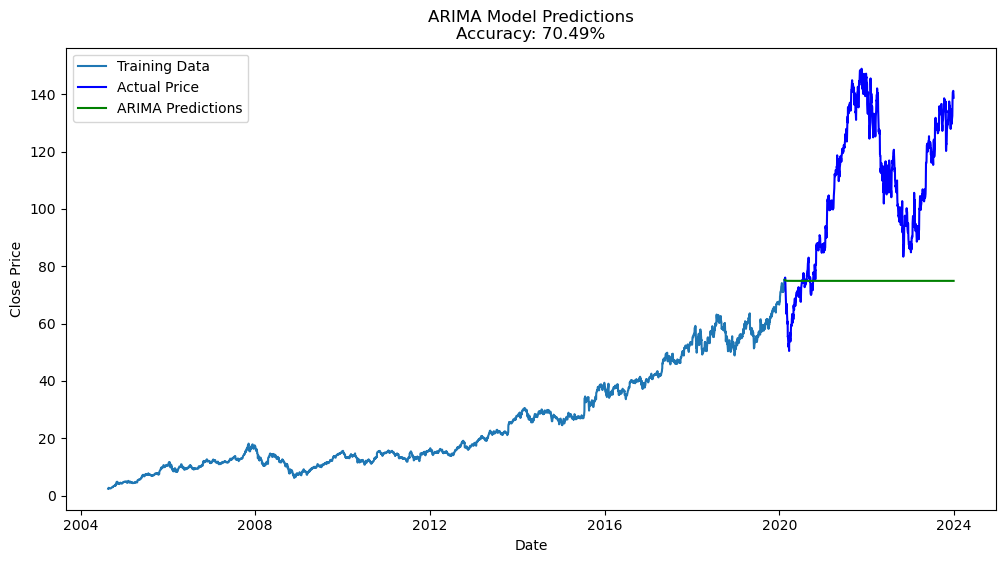

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label="Training Data")
plt.plot(test_data.index, test_data, label="Actual Price", color='blue')
plt.plot(test_data.index, arima_predictions, label="ARIMA Predictions", color='green')
plt.title(f"ARIMA Model Predictions\nAccuracy: {accuracy_arima:.2f}%")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

**SARIMA Model**

In [73]:
auto_sarima_model = auto_arima(train_data, seasonal=True, m=5, trace=True, error_action="ignore", suppress_warnings=True)
p, d, q = auto_sarima_model.order
P, D, Q, s = auto_sarima_model.seasonal_order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=4482.941, Time=7.67 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=4534.483, Time=0.44 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=4486.889, Time=0.68 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=4484.381, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=4539.755, Time=0.19 sec
 ARIMA(2,1,2)(0,0,1)[5] intercept   : AIC=4478.767, Time=6.08 sec
 ARIMA(2,1,2)(0,0,0)[5] intercept   : AIC=4481.952, Time=4.20 sec
 ARIMA(2,1,2)(0,0,2)[5] intercept   : AIC=4481.263, Time=8.36 sec
 ARIMA(2,1,2)(1,0,0)[5] intercept   : AIC=4478.768, Time=6.24 sec
 ARIMA(2,1,2)(1,0,2)[5] intercept   : AIC=4482.951, Time=9.73 sec
 ARIMA(1,1,2)(0,0,1)[5] intercept   : AIC=4477.435, Time=4.57 sec
 ARIMA(1,1,2)(0,0,0)[5] intercept   : AIC=4479.601, Time=2.77 sec
 ARIMA(1,1,2)(1,0,1)[5] intercept   : AIC=4480.432, Time=7.96 sec
 ARIMA(1,1,2)(0,0,2)[5] intercept   : AIC=4479.432, Time=5.83 sec
 ARIMA(1,1,2)(1,0,0)[5] intercept

In [74]:
sarima_model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fitted = sarima_model.fit()
sarima_predictions = sarima_fitted.forecast(steps=len(test_data))

In [75]:
mse_sarima = mean_squared_error(test_data, sarima_predictions)
mape_sarima = mean_absolute_percentage_error(test_data, sarima_predictions)
accuracy_sarima = 100 - mape_sarima * 100

print("SARIMA Model - MSE:", mse_sarima)
print("SARIMA Model - MAPE:", mape_sarima)
print("SARIMA Model - Accuracy:", accuracy_sarima, "%")

SARIMA Model - MSE: 1678.438990370975
SARIMA Model - MAPE: 0.29503286459499994
SARIMA Model - Accuracy: 70.49671354050001 %


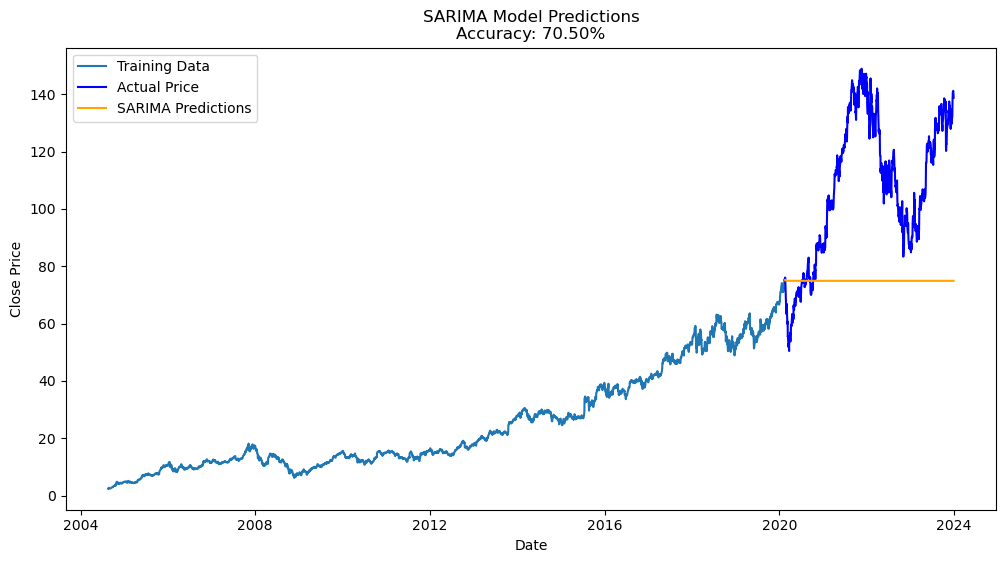

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label="Training Data")
plt.plot(test_data.index, test_data, label="Actual Price", color='blue')
plt.plot(test_data.index, sarima_predictions, label="SARIMA Predictions", color='orange')
plt.title(f"SARIMA Model Predictions\nAccuracy: {accuracy_sarima:.2f}%")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

**FBProphet Model**

**Prepare Data for Prophet**
*Rename columns for Prophet, as it requires ds for date and y for values.*

In [79]:
prophet_data = train_data.reset_index()
prophet_data.columns = ['ds', 'y']

In [80]:
prophet_model = Prophet()
prophet_model.fit(prophet_data)

future = prophet_model.make_future_dataframe(periods=len(test_data))
prophet_forecast = prophet_model.predict(future)
prophet_predictions = prophet_forecast['yhat'][-len(test_data):].values

17:46:41 - cmdstanpy - INFO - Chain [1] start processing
17:46:43 - cmdstanpy - INFO - Chain [1] done processing


In [81]:
mse_prophet = mean_squared_error(test_data, prophet_predictions)
mape_prophet = mean_absolute_percentage_error(test_data, prophet_predictions)
accuracy_prophet = 100 - mape_prophet * 100

print("Prophet Model - MSE:", mse_prophet)
print("Prophet Model - MAPE:", mape_prophet)
print("Prophet Model - Accuracy:", accuracy_prophet, "%")

Prophet Model - MSE: 1520.2620263169936
Prophet Model - MAPE: 0.27670249340225395
Prophet Model - Accuracy: 72.3297506597746 %


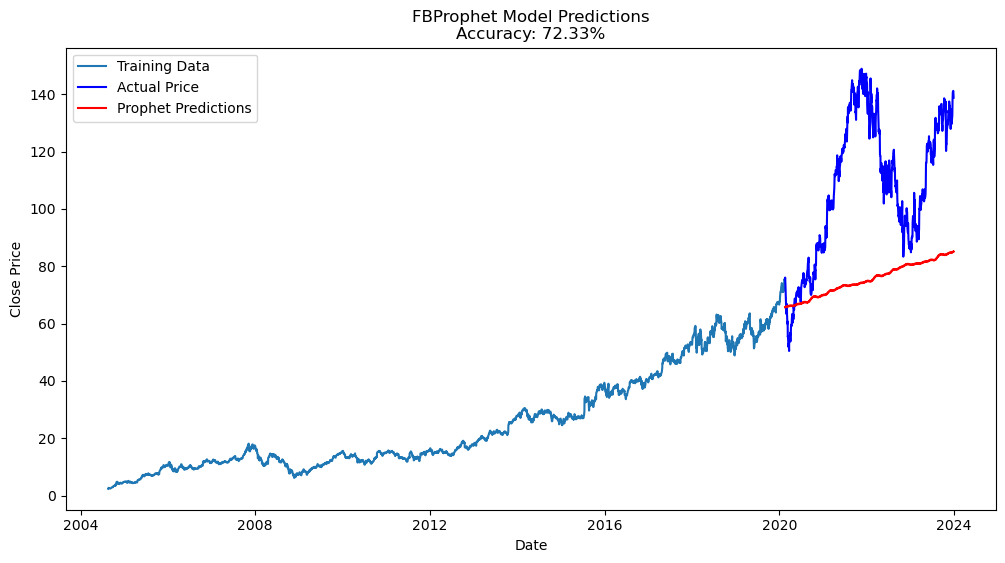

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label="Training Data")
plt.plot(test_data.index, test_data, label="Actual Price", color='blue')
plt.plot(test_data.index, prophet_predictions, label="Prophet Predictions", color='red')
plt.title(f"FBProphet Model Predictions\nAccuracy: {accuracy_prophet:.2f}%")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

*We can build Four more models and find the accuracy..*


Linear Regression

Random Forest Regressor

XGBoost Regressor

Support Vector Regression (SVR)


**Step 1: Prepare Data for Non-LSTM Models**

For these traditional models, we’ll need to create features (like lagged values) from the Close price to make it suitable for supervised learning. This preparation involves creating lagged versions of the Close column.

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# Prepare the data
Google['Close_Lag1'] = Google['Close'].shift(1)
Google['Close_Lag2'] = Google['Close'].shift(2)
Google['Close_Lag3'] = Google['Close'].shift(3)
Google.dropna(inplace=True)



In [86]:
# Split the data into train and test sets
train_size = int(len(Google) * 0.8)
train, test = Google[:train_size], Google[train_size:]

In [87]:
# Separate features and target
X_train, y_train = train[['Close_Lag1', 'Close_Lag2', 'Close_Lag3']], train['Close']
X_test, y_test = test[['Close_Lag1', 'Close_Lag2', 'Close_Lag3']], test['Close']

**Linear Regression**

In [89]:
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [90]:
# Make predictions
lr_predictions = lr_model.predict(X_test)

In [91]:
# Calculate accuracy
lr_mape = mean_absolute_percentage_error(y_test, lr_predictions) * 100
lr_accuracy = 100 - lr_mape
print("Linear Regression Model Accuracy:", lr_accuracy, "%")

Linear Regression Model Accuracy: 98.65141960108528 %


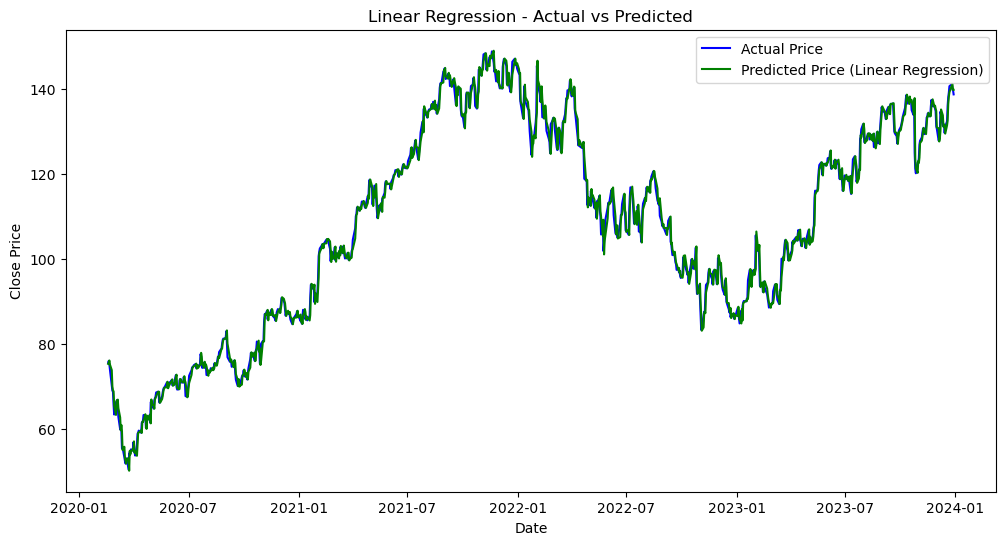

In [92]:
# Plotting Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, lr_predictions, label='Predicted Price (Linear Regression)', color='green')
plt.title("Linear Regression - Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [93]:
# Step 5: Predict for the next 30 days
n_future_days = 30
future_dates = pd.date_range(start=Google.index[-1] + pd.Timedelta(days=1), periods=n_future_days, freq='B')

In [94]:
# Get the last known prices to create future lagged features
last_prices = Google['Close'].iloc[-3:].values  # Get last 3 closing prices
future_predictions = []

In [95]:
for _ in range(n_future_days):
    # Create the lagged feature input for prediction
    if len(last_prices) < 3:
        raise ValueError("Not enough data to make future predictions.")

    future_input = np.array(last_prices[-3:]).reshape(1, -1)  # Reshape for the model

    # Predict the next closing price
    next_price = lr_model.predict(future_input)[0]
    future_predictions.append(next_price)

    # Update the last prices for the next iteration
    last_prices = np.append(last_prices, next_price)[-3:]  # Keep only the last 3 prices

In [96]:
# Step 6: Create a DataFrame for future predictions
future_predictions_df = pd.DataFrame(data=future_predictions, index=future_dates, columns=['Predicted Close'])

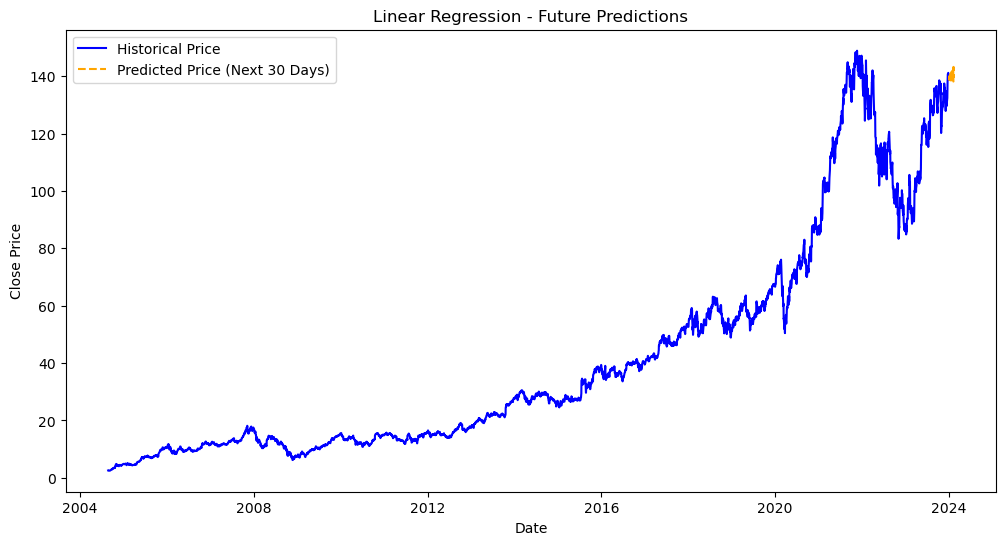

In [97]:
# Step 7: Visualize the future predictions
plt.figure(figsize=(12, 6))
plt.plot(Google.index, Google['Close'], label='Historical Price', color='blue')
plt.plot(future_predictions_df.index, future_predictions_df['Predicted Close'], label='Predicted Price (Next 30 Days)', color='orange', linestyle='dashed')
plt.title("Linear Regression - Future Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

**Random Forest Regressor**

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [101]:
# Make predictions
rf_predictions = rf_model.predict(X_test)

In [102]:
# Calculate accuracy
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions) * 100
rf_accuracy = 100 - rf_mape
print("Random Forest Model Accuracy:", rf_accuracy, "%")

Random Forest Model Accuracy: 72.22879940863427 %


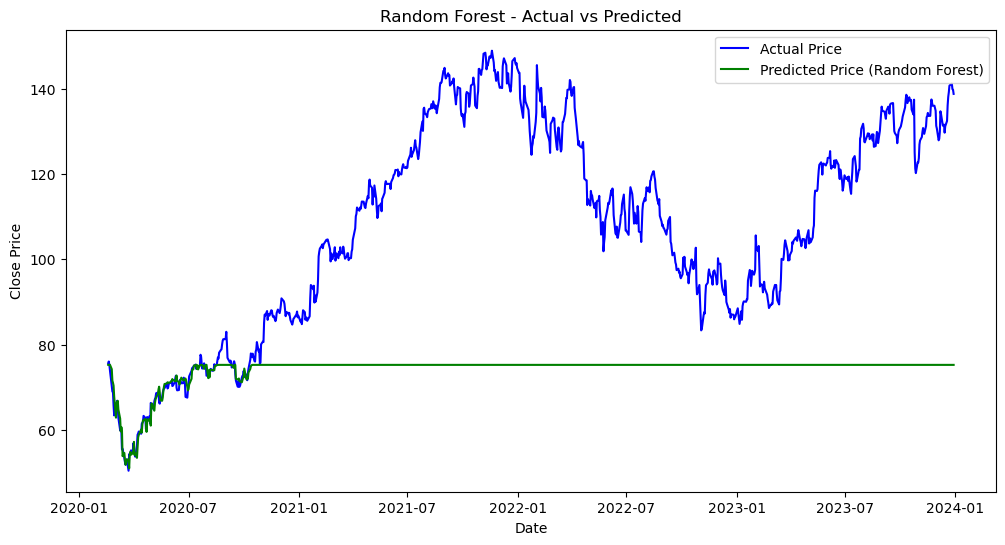

In [103]:
# Plotting Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, rf_predictions, label='Predicted Price (Random Forest)', color='green')
plt.title("Random Forest - Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

**XGBoost Regressor**

In [105]:
from xgboost import XGBRegressor

In [106]:
# Train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [107]:
# Make predictions
xgb_predictions = xgb_model.predict(X_test)

In [108]:
# Calculate accuracy
xgb_mape = mean_absolute_percentage_error(y_test, xgb_predictions) * 100
xgb_accuracy = 100 - xgb_mape
print("XGBoost Model Accuracy:", xgb_accuracy, "%")

XGBoost Model Accuracy: 70.99740926702066 %


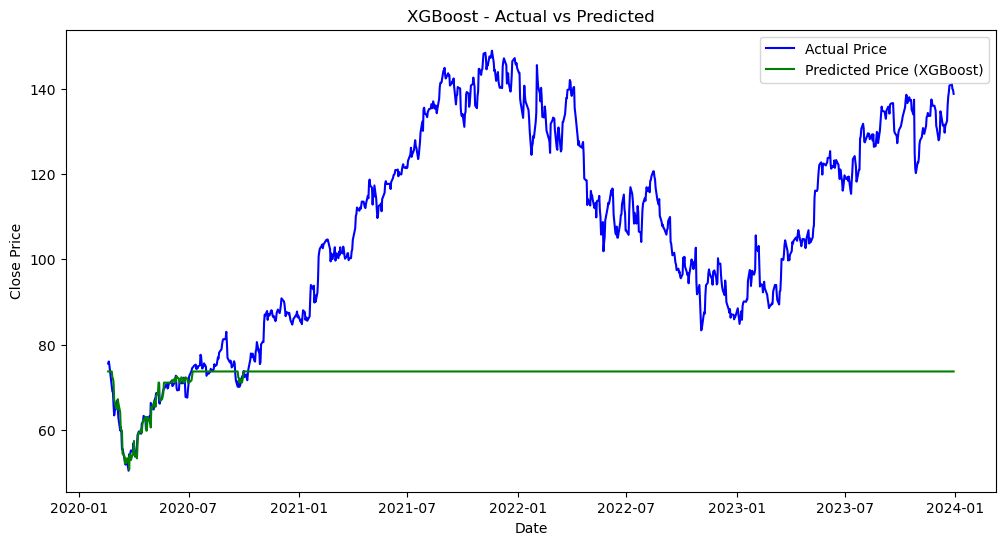

In [109]:
# Plotting Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, xgb_predictions, label='Predicted Price (XGBoost)', color='green')
plt.title("XGBoost - Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

**Support Vector Regression (SVR)**

In [111]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [112]:
# Standardize the features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
# Initialize and train the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

SVR(C=100, gamma=0.1)

In [114]:
# Make predictions
svr_predictions = svr_model.predict(X_test_scaled)

In [115]:
# Calculate accuracy
svr_mape = mean_absolute_percentage_error(y_test, svr_predictions) * 100
svr_accuracy = 100 - svr_mape
print("Support Vector Regression Model Accuracy:", svr_accuracy, "%")

Support Vector Regression Model Accuracy: 61.82886594668851 %


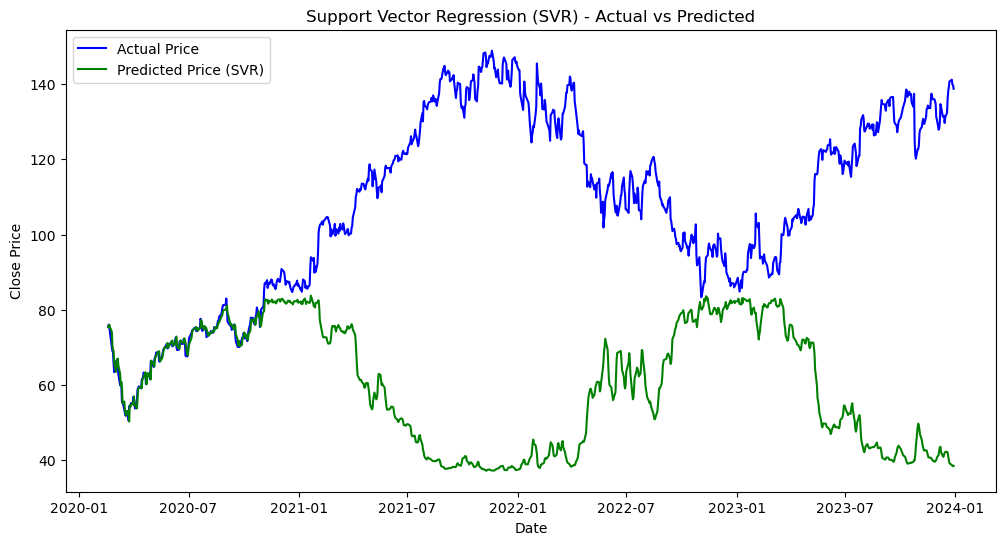

In [116]:
# Plotting Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, svr_predictions, label='Predicted Price (SVR)', color='green')
plt.title("Support Vector Regression (SVR) - Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

### Deployment Code

In [64]:
# Save the model
model.save('lstm_model.h5')

In [66]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
# Load the model
model = load_model('lstm_model.h5')

# Recompile the model with desired metrics if needed
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mse'])


In [68]:
streamlit_code =  """
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
import streamlit as st
import matplotlib.pyplot as plt
from datetime import timedelta

# Load the trained LSTM model
model = load_model(r"C:/Users/Yagnesh/lstm_model.h5")

# Function to download historical stock data
def download_data(ticker="GOOGL"):
    data = yf.download(ticker, start='2004-01-01', end='2024-01-01')
    data.reset_index(inplace=True)
    return data

# Function to preprocess the data: scale and create sequences
def preprocess_data(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data = data[['Date', 'Close']].set_index('Date')
    scaler = MinMaxScaler(feature_range=(0, 1))
    #data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
    scaled_data = scaler.fit_transform(data[['Close']])
    
    # Split the data into training set
    train_size = int(len(scaled_data) * 0.8)
    train_data = scaled_data[:train_size]
    return train_data, scaler

# Function to create sequences from the training data
def create_sequences(data, seq_length):
    x = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
    return np.array(x)

# Function to predict future stock prices for a specified number of days
def predict_future_price(seq_length, scaler, last_data, n_days=30):
    current_input = last_data.reshape(1, seq_length, 1)
    future_predictions = []

    for _ in range(n_days):
        next_pred = model.predict(current_input)
        future_predictions.append(next_pred[0, 0])
        
        # Update current_input for the next prediction
        next_pred_reshaped = next_pred.reshape(1, 1, 1)  # Reshape to (1, 1, 1)
        current_input = np.append(current_input[:, 1:, :], next_pred_reshaped, axis=1)

    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Streamlit app layout and functionality
st.title("📈 Google Stock Price Prediction")
st.sidebar.header("Settings")
st.sidebar.write("This app predicts future Google stock prices using an LSTM model.")

# Load historical data
data = download_data()

# Show historical data
if st.sidebar.checkbox("Show Historical Data"):
    st.subheader("Historical Data")
    st.write(data)

# Plot historical Closing Price data
st.subheader("### Historical Closing Price")
st.line_chart(data['Close'])

# Preprocess data and create sequences for prediction
train_data, scaler = preprocess_data(data)
seq_length = 60
sequences = create_sequences(train_data, seq_length)
last_known_data = sequences[-1]  # Use the last available sequence for predictions

# Set the number of days to predict into the future
n_future_days = st.sidebar.slider("Select number of days to predict into the future", 1, 180)

if st.sidebar.button("Predict"):
    try:
        future_prices = predict_future_price(seq_length, scaler, last_known_data, n_days=n_future_days)

        # Generate dates for the future predictions
        last_date = data['Date'].max()
        future_dates = [last_date + timedelta(days=i) for i in range(1, n_future_days + 1)]

        # Display results
        st.subheader("### Predicted Future Prices")
        prediction_df = pd.DataFrame({"Date": future_dates, "Predicted Close": future_prices.flatten()})
        st.write(prediction_df)

        # Plotting the future predictions
        plt.figure(figsize=(10, 5))
        plt.plot(prediction_df['Date'], prediction_df['Predicted Close'], marker='o', linestyle='-', color='orange', label='Predicted Close Price')
        plt.title("Future Predicted Stock Prices")
        plt.xlabel("Date")
        plt.ylabel("Predicted Close Price")
        plt.xticks(rotation=45)
        plt.grid()
        plt.legend()
        st.pyplot(plt)

    except Exception as e:
        st.error(f"An error occurred during prediction: {str(e)}")

# Footer
st.sidebar.markdown("---")
st.sidebar.write("Developed by Team 4")
st.sidebar.write("Using LSTM Model for Stock Price Prediction")
"""

In [70]:
# Save the Streamlit app code to a Python file with UTF-8 encoding
with open("stock_app.py", "w", encoding="utf-8") as f:
    f.write(streamlit_code)

In [72]:
# Run the Streamlit app
import subprocess
def run_streamlit():
    subprocess.Popen(["streamlit", "run", "stock_app.py"])

run_streamlit()

In [74]:
print("Streamlit app is running. Open the link below in your web browser:")
print("http://localhost:8501")

Streamlit app is running. Open the link below in your web browser:
http://localhost:8501
